In [ ]:
'''
use kepler's law to determine the found mass based on exostriker found data values (add column)
add another column for error between true mass and found mass
on the separate spreadsheets for all found vs some not found test:
X    1. how many planets in system 
X    2. what is the distance between each planet
    3. what is the mass difference between neighbors
X in addition to above (cutting limit) values also determine following for systems with all found planets:
X    1. what is cutting limit for period
X    2. what is cutting limit for amplitude 
apply each of these limits separately to systems with some not found to see if some still meet the limit
    determine what makes these systems distinct based on above values 
current exostriker data includes nontransiting & undetected planets so run exostriker again without:
    1. nontransiting
    2. un detected
    3. one and two
    see how the above values vary now between these four spreads (all planets, all transiting, all detected, all transiting/detected)
        here can see the effect of hidden planets on the above values (with some planets remove so values become inaccurate ie total number of planets)
'''

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
df = pd.read_pickle("complete_table.pkl")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [7]:
#calculating found planet mass
G = 6.6743 * 10**-11
solar_mass = 2 * 10**30
earth_mass = 6 *10**24
solar_radius = 7 * 10**8

#finding star mass - call from list star_mass based on star id (with star id 1 being index 0)
def metadata(filename):
    for i in range(36):
        f.readline()
f = open("ajaaf477t2_mrt copy.txt", 'r')
metadata(f)
data = {}
for elem in range(5391):
    line = f.readline().strip().split()
    if line[0] not in data:
        data[str(line[0])] = []
    data[str(line[0])].append(line[0:])   
inc = []
e = []
star_mass = []
for i in range(1,953):
    x = str(i)
    e.append(float(data[x][0][-4]))
    inc.append(float(data[x][0][-8]))
    Teff = float(data[x][0][3])
    star_mass.append(-22.296508 + (1.5446387*10**-2)*Teff - (3.488452*10**-6)*(Teff**2) + (2.64961*10**-10)*(Teff**3))

#finding found planet mass with exostriker data    
found_mass = []
for i in range(1,953):
    x = df[df['Star'] == i]
    for j in range(0,len(x)):
        if x.iloc[j]['Exo_Detection'] != 1.0: #not detected so no found mass
            found_mass.append(np.nan)
        if x.iloc[j]['Exo_Detection'] == 1.0: 
            numerator = x.iloc[j]['Found_Amp']*(star_mass[i-1]**(2/3))*((1-(e[i-1])**2)**1/2)
            denominator = (((2*np.pi*G)/(x.iloc[j]['Found_Period']*86400))**(1/3))*math.sin(inc[i-1])
            planet_mass= numerator/denominator
            mass = planet_mass/earth_mass
            found_mass.append(mass)

In [8]:
print(found_mass)
#something work with units

[(2.525739982416452e-19-4.37470997625342e-19j), (1.7411956125398241e-19-3.0158392668349907e-19j), (8.918194490372244e-20-1.5446765969105564e-19j), (1.547788515614462e-19-2.680848348415864e-19j), nan, (-3.6986180910022603e-19+6.406194451409328e-19j), nan, nan, nan, nan, nan, (1.722320618918778e-19-2.9831468188908e-19j), (1.454231603043812e-18-2.5188030224442188e-18j), nan, (8.401219990475358e-19-1.4551339869066649e-18j), (8.812790011274838e-19-1.5264200055963527e-18j), nan, nan, (2.868296907889541e-19-4.968035975657395e-19j), (2.2551833882856415e-19-3.906092208896065e-19j), (2.796375943847556e-19-4.843465211807345e-19j), (2.3970802982870717e-19-4.151864866455569e-19j), (-8.36401782922489e-19+1.4486903835629464e-18j), (-1.0144095559475553e-18+1.7570088905845505e-18j), nan, (-1.1885783008398268e-18+2.058678005828467e-18j), (-3.67002008885081e-19+6.356661258688052e-19j), (-3.614106957348141e-19+6.25981687411515e-19j), nan, (-1.4589344132672473e-19+2.5269485286895634e-19j), nan, (-3.2199610

In [2]:
#test on detected vs undetected: run through so its those with ALL planets detected & those with some undetected
df_detected = df[df['Exo_Detection'] == 1]
df_undetected = df[df['Exo_Detection'] != 1]
undetected_systems1 = list(df_undetected['Star'])
undetected_system = []
[undetected_system.append(x) for x in undetected_systems1 if x not in undetected_system]
x = list(df_detected['Star'])
remove = []
for i in range(0,len(x)):
    if x[i] in undetected_system:
        remove.append(i)       
for i in remove:
    df_undetected = df_undetected.append(df_detected.iloc[i])
for i in undetected_system:
    indexNames = df_detected[df_detected['Star'] == i ].index
    df_detected.drop(indexNames , inplace=True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/

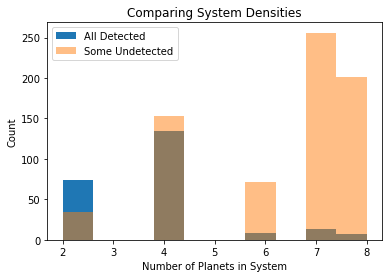

In [9]:
#comparing system size - histograms of frequency of mass densities for each dataframe
df_detected_density = df_detected.drop_duplicates(subset=['Star'], keep='first')
df_undetected_density = df_undetected.drop_duplicates(subset=['Star'], keep='first')
size_detected = list(df_detected_density['Total_Planet'])  
size_undetected = list(df_undetected_density['Total_Planet']) 

plt.hist(size_detected, label='All Detected')
plt.hist(size_undetected, alpha = 0.5, label='Some Undetected')
plt.title('Comparing System Densities')
plt.xlabel('Number of Planets in System')
plt.ylabel('Count')
plt.legend()
plt.show()

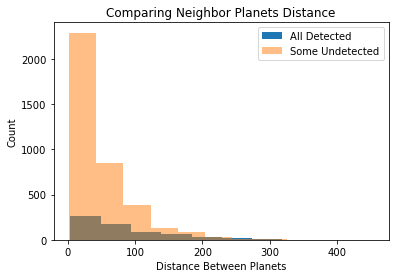

In [30]:
#comparing the distance between planets
#detected data
detected_stars = set(df_detected['Star'])
detected_distances = []
for i in detected_stars:
    x = df_detected[df_detected['Star'] == i]
    major_axis = sorted(list(x['Major_Axis']))
    for j in range(0, len(major_axis)-1):
        detected_distances.append(major_axis[j+1]-major_axis[j])
        
#undetected data
undetected_stars = set(df_undetected['Star'])
undetected_distances = []
for i in undetected_stars:
    x = df_undetected[df_undetected['Star'] == i]
    major_axis = sorted(list(x['Major_Axis']))
    for j in range(0, len(major_axis)-1):
        undetected_distances.append(major_axis[j+1]-major_axis[j])
        
plt.hist(detected_distances, label='All Detected')
plt.hist(undetected_distances, alpha = 0.5, label='Some Undetected')
plt.title('Comparing Neighbor Planets Distance')
plt.xlabel('Distance Between Planets')
plt.ylabel('Count')
plt.legend()
plt.show() 
#doesn't seem to have impact - consider comparing distance when both neighbor detected vs when one isnt

In [32]:
#systems with all planets found cutting limit for period & amplitude:
found_period_limit = max(list(df_detected['Found_Period']))
true_period_limit = max(list(df_detected['True_Period']))
found_amp_limit = max(list(df_detected['Found_Amp']))
true_amp_limit = max(list(df_detected['True_Amp']))
print("Upper Limit for found period: {} & true period: {}".format(found_period_limit, true_period_limit))
print("Upper Limit for found amp: {} & true amp: {}".format(found_amp_limit, true_amp_limit))

Upper Limit for found period: 199.3741692776593 & true period: 198.13
Upper Limit for found amp: 18.799858238653666 & true amp: 18.899582508720105


In [37]:
undetected_in_period_limit = df_undetected[df_undetected['Found_Period'] < found_period_limit]
print(len(undetected_in_period_limit))
undetected_in_amp_limit = df_undetected[df_undetected['Found_Amp'] < found_amp_limit]
print(len(undetected_in_amp_limit))
print(len(df_undetected))
#around half of the found exostriker data is over the limits HMMM 
#what is less than limit is like the detected data and what is more is different

2386
2386
4506


In [22]:
import numpy as np
import pandas as pd

G = 6.6743 * 10**-11
solar_mass = 2 * 10**30
earth_mass = 6 *10**24
AU = 1.5 *10**11
solar_radius = 7 * 10**8

def metadata(filename):
    for i in range(36):
        f.readline()

    
#use their timestamp & error
t = open("hip5364.vels", 'r')
lines=t.readlines()
time=[]
error = []
for x in lines:
    time.append(float(x.split('    ')[1]))
    error.append(float(x.split('    ')[3]))
t.close()
#time = np.array(time)
time = np.arange(0,80,.1)

        
#generating sine waves
f = open("ajaaf477t2_mrt copy.txt", 'r')
metadata(f)


#read in table
data = {}
for elem in range(5391):
    line = f.readline().strip().split()
    if line[0] not in data:
        data[str(line[0])] = []
    data[str(line[0])].append(line[0:])
    
#find individual planet RV sine wave
phase_list = [[]for i in range(953)]
true_amp = []
true_periods = []
transit = []
detect = []
ID = []
planet = []
total_planet = []
planet_mass = []
major_axis = []
for i in range(120,125):
    x = str(i)
    tot = len(data[x])
    tot_planet = [len(data[x])]*tot
    total_planet.extend(tot_planet)
    for j in range(0,len(data[x])):
        e = float(data[x][j][-4])
        true_periods.append(float(data[x][j][8]))
        transit.append(float(data[x][j][-2]))
        detect.append(float(data[x][j][-1]))
        ID.append(float(data[x][j][0]))
        planet.append(float(data[x][j][1]))
        planet_mass.append(float(data[x][j][11]))
        period = float(data[x][j][8])*86400
        period_sin = float(data[x][j][8])
        inc = float(data[x][j][-8]) * (np.pi/180)
        Teff = int(data[x][j][2])
        p_mass = float(data[x][j][-7])
        major_axis.append(float(data[x][j][-9]))
        
        #finding star mass & radius
        star_mass = -22.296508 + (1.5446387*10**-2)*Teff - (3.488452*10**-6)*(Teff**2) + (2.64961*10**-10)*(Teff**3)
        star_radius = -16.883175 + 1.1835396*10**-2*Teff - (2.70872*10**-6)*(Teff**2) + 2.105028*10**-10*(Teff**3)
     
        p_mass = p_mass * earth_mass
        star_mass = star_mass * solar_mass
        star_radius = star_radius * solar_radius       
        
        #finding semi-major axis both ways
        a_r = float(data[x][j][-9])
        a_table = star_radius*a_r
        
        #generating sine wave
        phase = np.random.uniform(0,2*np.pi)
        amp_table = G**(1/2)*(star_mass + p_mass)**(-1/2)*(a_table)**(-1/2)*p_mass*np.cos(inc)
        RV = amp_table * np.sin(((time*2*np.pi)/period_sin - phase))
        amp = G**(1/2)*(star_mass + p_mass)**(-1/2)*(a_table)**(-1/2)*p_mass*np.cos(inc)
        
        true_amp.append(amp)
        data[x][j] = RV
        phase_list[i].append(phase)

In [11]:
#for i in range(0, 7):      
 #   data['124'][i] = [round(num, 1) for num in data['124'][i]]
  #  with open("Star124_Planet{}.txt".format(i), 'w') as f:
   #     for a,b,c in zip(time, data['124'][i], error):
    #        f.write('{0:15}{1:15}{2:15}\n'.format(a, b, c)) 

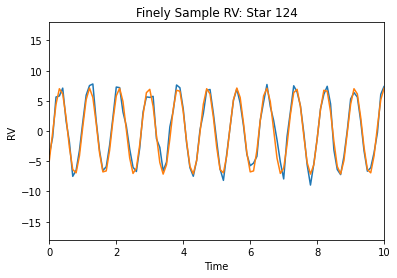

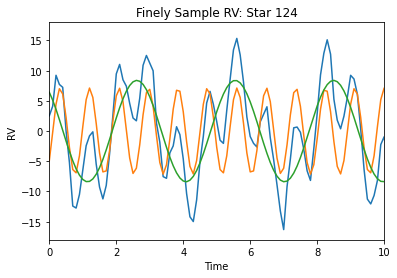

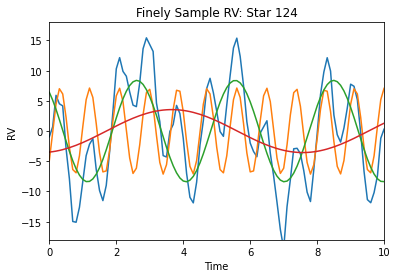

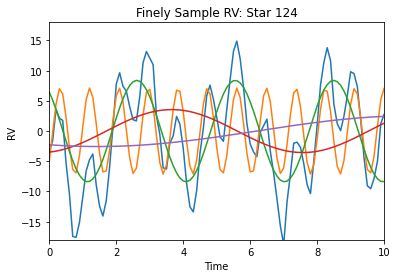

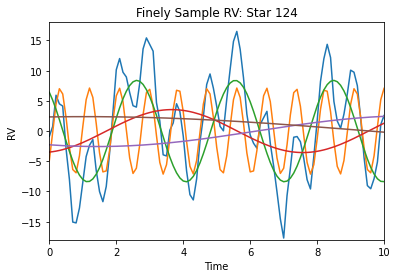

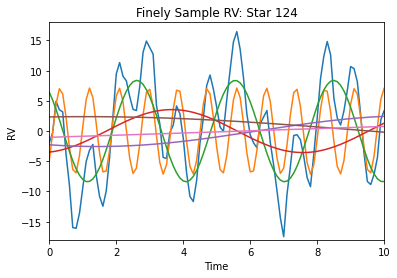

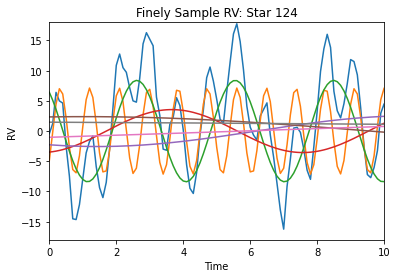

In [44]:

noise = np.random.normal(0, 1, 800)
rv_sum = np.add(data['124'][0], noise)
plt.plot(time, rv_sum)
plt.plot(time, data['124'][0])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv1.png', dpi=100)
plt.show()


rv_sum = np.add(rv_sum, data['124'][1])
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv2.png', dpi=100)
plt.show()


rv_sum = np.add(rv_sum, data['124'][2]) 
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.plot(time, data['124'][2])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv3.png', dpi=100)
plt.show()

rv_sum = np.add(rv_sum, data['124'][3]) 
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.plot(time, data['124'][2])
plt.plot(time, data['124'][3])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv4.png', dpi=100)
plt.show()

rv_sum = np.add(rv_sum, data['124'][4]) 
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.plot(time, data['124'][2])
plt.plot(time, data['124'][3])
plt.plot(time, data['124'][4])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv5.png', dpi=100)
plt.show()

rv_sum = np.add(rv_sum, data['124'][5]) 
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.plot(time, data['124'][2])
plt.plot(time, data['124'][3])
plt.plot(time, data['124'][4])
plt.plot(time, data['124'][5])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv6.png', dpi=100)
plt.show()

rv_sum = np.add(rv_sum, data['124'][6]) 
plt.plot(time,rv_sum)
plt.plot(time, data['124'][0])
plt.plot(time, data['124'][1])
plt.plot(time, data['124'][2])
plt.plot(time, data['124'][3])
plt.plot(time, data['124'][4])
plt.plot(time, data['124'][5])
plt.plot(time, data['124'][6])
plt.xlim(0,10)
plt.ylim(-18,18)
plt.title("Finely Sample RV: Star 124")
plt.xlabel("Time")
plt.ylabel("RV")
plt.savefig('rv7.png', dpi=100)
plt.show()

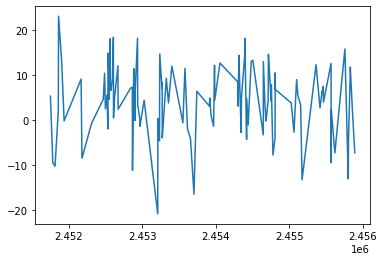

In [22]:
rv_sum = np.add(data['124'][0], data['124'][1])
if len(data['124']) > 2:
    for j in range(2, len(data['124'])):
        rv_sum = np.add(rv_sum, data['124'][j])
rv_sum = np.add(rv_sum, error) 
plt.plot(time,rv_sum)

In [39]:
noise1 = np.random.normal(0, 50, 30)
print(len(noise1))

30
